In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor

In [2]:
train_df = pd.read_csv("../data/processed/train_fe.csv")
val_df = pd.read_csv("../data/processed/val_fe.csv")

In [3]:
target = "price"
x_train = train_df.drop(columns=[target])
y_train = train_df[target]
x_val = val_df.drop(columns=[target])
y_val = val_df[target]

## XGBoost
 Tree Based model.
 * No need to scale features
 * Robust to the multicollinear features
 * Default parameters work well

In [4]:
xgb_reg = XGBRegressor()
xgb_reg.fit(x_train, y_train)
y_pred_xgb = xgb_reg.predict(x_val)
print("XGBoost Regression")
print("MAE:", mean_absolute_error(y_val, y_pred_xgb))
print("MSE:", mean_squared_error(y_val, y_pred_xgb))
print("R2:", r2_score(y_val, y_pred_xgb))

XGBoost Regression
MAE: 34752.798539252806
MSE: 6159453636.065436
R2: 0.9523899288110343


* Default model almost given the the good accuracy
* we can further fintune the model for the best scores

## XGB Feature Importance

In [5]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

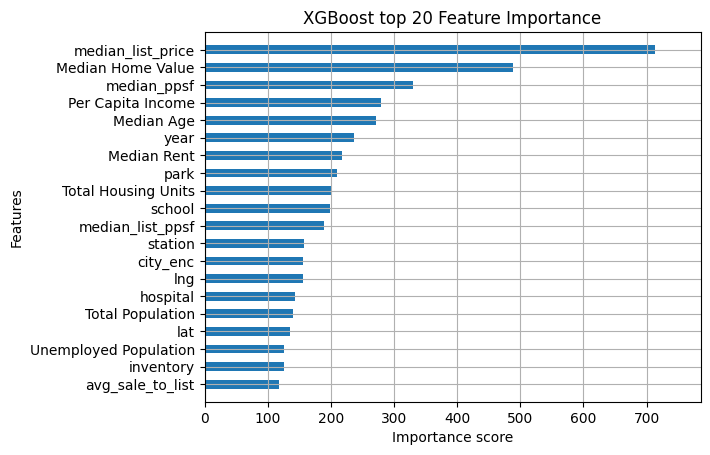

In [7]:
plot_importance(xgb_reg, max_num_features=20, height=0.5, importance_type='weight',show_values=False)
plt.title("XGBoost top 20 Feature Importance")
plt.show()

*  Features associated to the price influence the regressor more